### Descripción del archivo
En este notebook "00_exploracion" se ejecutan codigos para dar respuesta a la exploración inicial del dataset a elección para el proyecto final

In [1]:
# Importo librerias de python
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Declaro el dataframe a usar
eccomerce_sales =r'C:\Users\Administrador\OneDrive - udd.cl\Python para la ciencia de datos\proyecto_final\Data\Police_Arrests_20240702.csv'
df = pd.read_csv(eccomerce_sales)

In [3]:
# Desripción incial del DF
print("Tamaño del DataFrame:", df.shape)
n_columnas=df.shape[1]
print("Las ",(n_columnas),"variables del DF son: ",df.columns.values.tolist())

# Tipo de variables y valores nulos
info = df.info()
print(info)

# Se identifico que no todas tienen el mismo "n", por ende, verifico las variables con valores nulos
valores_nulos = df.isnull() | df.eq('')
columnas_con_nulos = valores_nulos.any(axis=0)
print("\nColumnas con valores faltantes:")
print(columnas_con_nulos[columnas_con_nulos].index.tolist())

# Calculo el total de valores nulos por columna
total_nulos_por_columna = df.isnull().sum()
columnas_con_nulos = total_nulos_por_columna[total_nulos_por_columna > 0]
print("\nTotal de valores nulos por columna:")
print(columnas_con_nulos.to_string())


Tamaño del DataFrame: (23510, 10)
Las  10 variables del DF son:  ['ID Reference Number ', "Subject's race", "Subject's gender", "Subject's age", 'Ethnicity', 'District of occurrence', 'Adjacent to School', 'Assigned Division', 'Assigned Bureau', 'Event Date/Time']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null

In [4]:

# Verifico si hay duplicados en la columna que registra
duplicados = df[df.duplicated(subset=['ID Reference Number '], keep=False)]
num_duplicados = len(df) - len(df.drop_duplicates(subset=['ID Reference Number ']))
print(f"\nNúmero de duplicados en ID Reference Number: {num_duplicados}")



Número de duplicados en ID Reference Number: 0


### Descripción del dataset Police_Arrests_20240702
Este dataset contiene datos caracteristicos de los individuos arrestados por la policía en una ubicación geografica especifica, con 23.510 registros y 10 variables  

**a) Variables:**
- `1.-ID Reference Number`
- `2.-Subject's race`
- `3.-Subject's gender`
- `4.-Subject's age`
- `5.-Ethnicity`
- `6.-District of occurrence`
- `7.-Adjacent to School`
- `8.-Assigned Division`
- `9.-Assigned Bureau`
- `10.-Event Date/Time`

**b) Caracterización incial:**  
Es un dataframe con 3 tipos de variables: float64(1), int64(3), object(6)  
Desde el punto de vista  la analitica, de las 10 variables, siete variables  describen el evento mediante categorias, posee una variable númerica, referida a la edad del sujeto, una variable temporal almacenada como objeto que indica cuando ocurrio el evento, y la restante, es el identificador del evento,

**c) Valores nulos:**
Se identificaron valores faltantes o nulos en tres variables:

| Variable               | Valores nulos |
|------------------------|---------------|
| District of occurrence | 102           |
| Assigned Division      | 129           |
| Assigned Bureau        | 4659          |

**d) Identificador:**  
Se valido que no se poseen registros con valores nulos o duplicados

In [5]:
# Verifico las primeras filas para entender la estructura del las variables dataset
print(df.head())

   ID Reference Number           Subject's race Subject's gender  \
0                     1                   Asian             Male   
1                     2  Black/African American             Male   
2                     3  Black/African American             Male   
3                     4  Black/African American             Male   
4                     5                   White           Female   

   Subject's age     Ethnicity  District of occurrence  Adjacent to School  \
0             43  NON-HISPANIC                     6.0                   0   
1             23  NON-HISPANIC                     1.0                   0   
2             18  NON-HISPANIC                     1.0                   0   
3             21  NON-HISPANIC                     1.0                   0   
4             38      HISPANIC                     4.0                   0   

  Assigned Division Assigned Bureau Event Date/Time  
0               TOD             FSB   1/1/2021 1:07  
1             

In [7]:
# Verifico los posibles valores para las variables categoricas
variables = ["Subject's race","Subject's gender", 'Ethnicity', 'District of occurrence',
             'Adjacent to School', 'Assigned Division', 'Assigned Bureau']


for var in variables:
    valores_unicos = df[var].unique()
    cantidad_valores = len(valores_unicos)
    print(f"- Los {cantidad_valores} posibles valores para {var} son: {valores_unicos}")

- Los 6 posibles valores para Subject's race son: ['Asian' 'Black/African American' 'White' 'Unknown'
 'American Indian/ALSK Natv' 'Hawaiian/Pacific Islander']
- Los 2 posibles valores para Subject's gender son: ['Male' 'Female']
- Los 2 posibles valores para Ethnicity son: ['NON-HISPANIC' 'HISPANIC']
- Los 8 posibles valores para District of occurrence son: [ 6.  1.  4.  3.  5.  2.  8. nan]
- Los 2 posibles valores para Adjacent to School son: [0 1]
- Los 25 posibles valores para Assigned Division son: ['TOD' 'RCPD' 'TPPD' 'GPD' '4D' '3D' '5D' '6D' 'IMTD' '2D' '1D' 'SVID'
 'CID' 'MCFM' 'SID' 'PSTA' nan 'MCSO' 'MCD' 'SOD' 'CED' 'PSCC' 'FSB'
 'PERS' 'ISB']
- Los 5 posibles valores para Assigned Bureau son: ['FSB' nan 'PSB' 'MSB' 'ISB']


### Descripción del dataset Police_Arrests_20240702

**e) Descripción de variables categóricas:**  
De las variables para categorizar se describe sus valores  
| Variable                | Posibles Valores                                                                                   | Número de Valores Únicos |
|-------------------------|----------------------------------------------------------------------------------------------------|--------------------------|
| Subject's race          | ['Asian' 'Black/African American' 'White' 'Unknown' 'American Indian/ALSK Natv' 'Hawaiian/Pacific Islander'] | 6                        |
| Subject's gender        | ['Male' 'Female']                                                                                 | 2                        |
| Ethnicity               | ['NON-HISPANIC' 'HISPANIC']                                                                       | 2                        |
| District of occurrence  | [6. 1. 4. 3. 5. 2. 8. nan]                                                                        | 8                        |
| Adjacent to School      | [0 1]                                                                                             | 2                        |
| Assigned Division       | ['TOD' 'RCPD' ... 'FSB']                                                                          | 25                       |
| Assigned Bureau         | ['FSB' nan 'PSB' 'MSB' 'ISB']                                                                     | 5                        |



**esto considera valores nulos*05

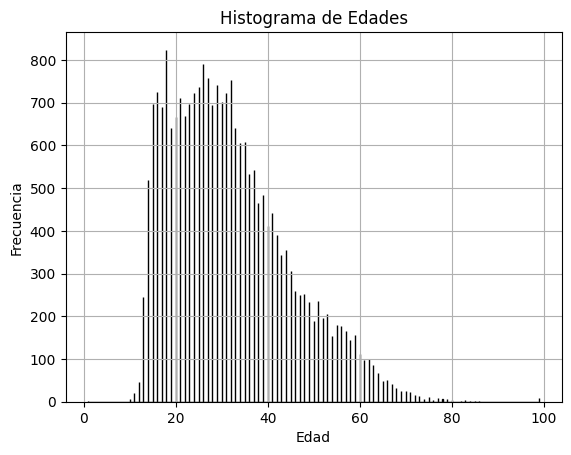

count    23510.000000
mean        31.813143
std         12.946909
min          1.000000
25%         22.000000
50%         30.000000
75%         39.000000
max         99.000000
Name: Subject's age, dtype: float64


In [8]:
# Verifico distribución de edad mediante histograma
plt.hist(df["Subject's age"], bins=df['ID Reference Number '].nunique(), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Estadísticos descriptivos
edad = df["Subject's age"].describe()
print(edad)

### Descripción del dataset Police_Arrests_20240702

**f) Descripción para variable númerica:**  
La unica variable númerica es la edad y se distribuye de la siguiente manera: 
 
| Estadística | Valor     |
|-------------|-----------|
| count       | 23510     |
| mean        | 31.813143 |
| std         | 12.946909 |
| min         | 1         |
| 25%         | 22        |
| 50%         | 30        |
| 75%         | 39        |
| max         | 99        |

**posee un valor minimo con posible error a tener "1" año de edad" y el maximo debiese ser determinado en función de las leyes del pais pero una edad de 99 causa sospecha de error

In [10]:
# Calcular la temporalidad del df
fecha = pd.to_datetime(df['Event Date/Time'])
diferencia = fecha.max() - fecha.min()
dias = diferencia.days
max_year = fecha.max().year
min_year = fecha.min().year
print(f"El DataFrame tiene un total de registros de {dias} días entre la fecha máxima y la fecha mínima.")
print(f"Año máximo: {max_year}")
print(f"Año mínimo: {min_year}")

El DataFrame tiene un total de registros de 1277 días entre la fecha máxima y la fecha mínima.
Año máximo: 2024
Año mínimo: 2021


### Descripción del dataset Police_Arrests_20240702

**g) Descripción para variable númerica:**  
El año minimo es 2021 y maximo 2024, posee 1277 días entre la fecha máxima y la fecha minima

### Descripción del dataset Police_Arrests_20240702

**h) Decripción final de variables:**
- `1.-ID Reference Number`: es el identificador de cada caso policial
- `2.-Subject's race`: corresponde a la "raza" del individuo 
- `3.-Subject's gender`: genero almacenado de manera "binario" 
- `4.-Subject's age`: Años de edad
- `5.-Ethnicity`: caracteriza si es hispano o no
- `6.-District of occurrence`: Lugar donde ocurrio
- `7.-Adjacent to School`: corresponde a si es cerca de un establecimiento educacional
- `8.-Assigned Division` : la división que tomo el caso
- `9.-Assigned Bureau`: la oficina que tomo el caso
- `10.-Event Date/Time`: la fecha del suceso

**i) Conclusines:**
Se sugiere filtrar la edad por el caso de datos con edad menora 18 años y eliminar datos vacios de las tres variables que se identificaron para continuar con los analisis